In [10]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten
import matplotlib.pyplot as plt

In [5]:
from keras.datasets import fashion_mnist

In [6]:
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

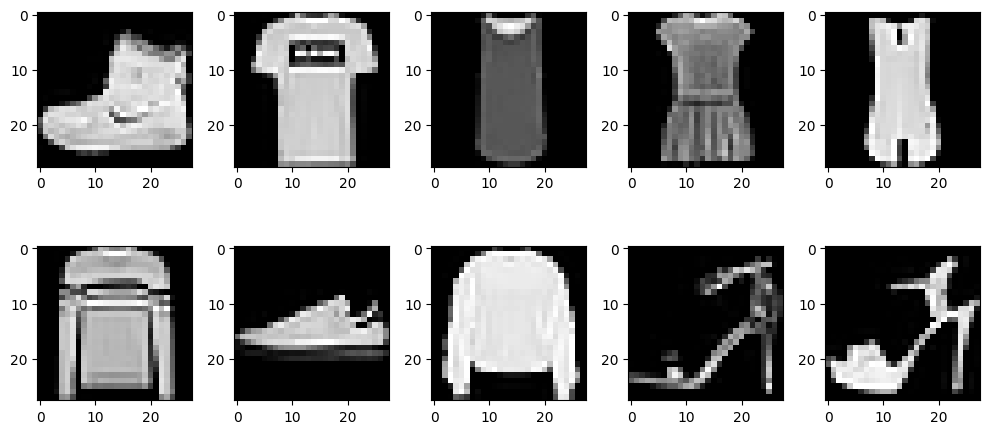

In [17]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.grid(False)
    plt.imshow(X_train[i], cmap='gray')
   
plt.tight_layout()
plt.show()

In [18]:
X_train = X_train /255.0
X_test = X_test/255.0

In [19]:
class_names = ['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [20]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

In [21]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [23]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10


1500/1500 [==============================] - 6s 3ms/step - loss: 1.1876 - accuracy: 0.6231 - val_loss: 0.7513 - val_accuracy: 0.7345
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.6794 - accuracy: 0.7582 - val_loss: 0.6191 - val_accuracy: 0.7762
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5933 - accuracy: 0.7857 - val_loss: 0.5657 - val_accuracy: 0.7955
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5473 - accuracy: 0.8049 - val_loss: 0.5321 - val_accuracy: 0.8111
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5174 - accuracy: 0.8176 - val_loss: 0.5092 - val_accuracy: 0.8173
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4950 - accuracy: 0.8263 - val_loss: 0.4926 - val_accuracy: 0.8267
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4787 - accuracy: 0.8326 - val_loss: 0.4765 - val_accurac

In [24]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.4746 - accuracy: 0.8289
Test accuracy: 0.8289


In [30]:
# Predict on test images
predictions = model.predict(X_test[:10])

1/1 [==============================] - 0s 27ms/step


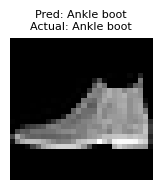

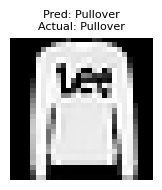

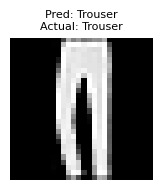

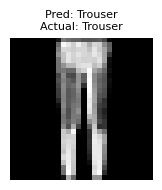

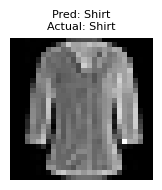

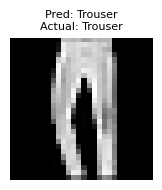

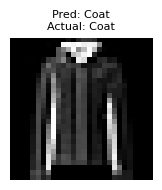

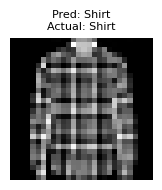

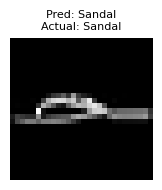

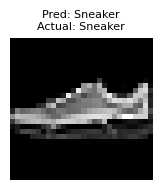

In [31]:
# Show predictions for first 5 test images
for i in range(10):
    plt.figure(figsize=(2, 2))
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Pred: {class_names[np.argmax(predictions[i])]}\nActual: {class_names[y_test[i]]}", fontsize=8)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

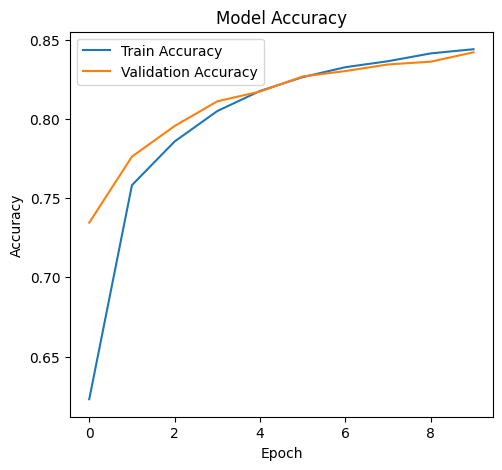

In [32]:
# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()